# Đồ án cuối kỳ:
(Cập nhật lần cuối: 04/07/2021)\
Nhóm 7
Thành viên:
 1. 18120062 - Nguyễn Hoàng Nam
 2. 18120096 - Trương Đại Triều

----

<h1>Bảng nội dung<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-thư-viện" data-toc-modified-id="Import-thư-viện-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import thư viện</a></span></li><li><span><a href="#Thu-thập-dữ-liệu" data-toc-modified-id="Thu-thập-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Thu thập dữ liệu</a></span></li><li><span><a href="#Khám-phá-dữ-liệu-&-tiền-xử-lý-dữ-liệu" data-toc-modified-id="Khám-phá-dữ-liệu-&-tiền-xử-lý-dữ-liệu-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Khám phá dữ liệu & tiền xử lý dữ liệu</a></span></li><li><span><a href="#Phân-tích-để-trả-lời" data-toc-modified-id="Phân-tích-để-trả-lời-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Phân tích để trả lời</a></span></li><li><span><a href="#Nhìn-lại-quá-trình-làm-đồ-án" data-toc-modified-id="Nhìn-lại-quá-trình-làm-đồ-án-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Nhìn lại quá trình làm đồ án</a></span></li><li><span><a href="#Tài-liệu-tham-khảo" data-toc-modified-id="Tài-liệu-tham-khảo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tài liệu tham khảo</a></span></li></ul></div>

---

# Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from pyecharts.globals import ThemeType

---

# Thu thập dữ liệu

## Dữ liệu của bạn là về chủ đề gì và bạn lấy từ nguồn nào?

Dữ liệu nói về việc tiêm vaccine phòng Covid-19, ở nhiều quốc gia được cập nhập thường xuyên. Dữ liệu được lưu tại 

(https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations)

##  Người ta có cho phép bạn dùng dữ liệu như này không?


License gốc được public trên trang [OurWorldInData](https://ourworldindata.org/coronavirus), các dataset được cấp quyền tái sử dụng tự do "[Reuse our work freely](https://ourworldindata.org/coronavirus#licence)". Đây là trang web cung cấp đầy đủ thông tin, về tình hình dịch bệnh, số ca nhiễm, tử vong, phân phối vacine trên từng quốc gia, vùng lãnh thổ. Trang web được phát triển bởi trường [Đại học Oxford, Anh](https://www.oxfordmartin.ox.ac.uk/global-development) và tổ chức phi lợi nhuận [Global Change Data Lab](https://global-change-data-lab.org/) 


##  Người ta thu thập dữ liệu như thế nào?

Dữ liệu được các tổ chức tại các quốc gia cập nhập hiện tại có đã bao gồm dữ liệu của 169 quốc gia.

---

# Khám phá dữ liệu & tiền xử lý dữ liệu

## Đọc dữ liệu từ file csv vào dataframe

In [2]:
vaccinations=pd.read_csv('data.csv')
vaccinations.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Dữ liệu có tổng cộng **30809** dòng và **12** cột

In [3]:
shape = vaccinations.shape
n_rows=shape[0]
n_cols=shape[1]
print(n_rows)
print(n_cols)

30809
12


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng cho biết số người đã tiêm vaccine, loại vaccine, đã tiêm đủ 2 mũi chưa cho trong các ngày được ghi nhận. Ngoài ra cũng có biết thêm thông tin số người bị bệnh theo tỉ lệ để thể hiện được quy mô của dịch bênh theo quốc gia, khu vực. Do các dòng đều được các tổ chức lớn thêm nên ít có dòng sai khác.

## Dữ liệu có các dòng bị lặp không?

In [4]:
vaccinations[vaccinations.duplicated()].shape[0] != 0

False

## Mỗi cột có ý nghĩa gì?¶

**Ý nghĩa của từng cột:**
- **location**: Tên quốc gia (hoặc vùng lãnh thổ trong 1 quốc gia(.
- **iso_code**: ISO 3166-1  và 3 ký tự cuối là mã quốc gia.
- **date**: Ngày quan trắc.
- **total_vaccinations**: Tổng số liều đã được sử dụng. Đơn vị tính là liều đã tiêm, có thể không bằng tổng số người đã tiêm. Nếu một người tiêm một liều thì đếm tăng lên 1 đơn vị. Nếu họ tiêm liều thứ 2 thì cũng tăng thêm 1 đơn vị
- **people_vaccinated**: Tổng số người nhận ít nhất một mũi tiêm. Nếu một người đã tiêm 1 mũi, thì đếm tăng lên 1 đơn vị. Nếu họ được tiêm liều thứ 2, thi giữ nguyên.
- **people_fully_vaccinated**: Tổng số người đã tiêm đủ 2 liều vaccine. Nếu một người nhận đủ 2 liều vaccine, thì đếm tăng lên 1. Nếu học chỉ mới tiêm 1 liều thì giữ nguyên
- **daily_vaccinations_raw**: Số lượng liều vaccine được sử dụng mỗi ngày, cập nhật theo ngày.
- **daily_vaccintions**:Số lượng liều vaccine được sử dụng mỗi ngày, cập nhật theo ngày. Dữ liệu đã được chuẩn hóa hơn.
- **total_vaccinations_per_hundred**: total_vaccinations trên 100 dân trong tổng dân số của quôc gia đó.
- **people_vaccinated_per_hundred**: people_vaccinated trên 100 dân trong tổng dân số quốc gia đó.
- **people_fully_vaccinated_per_hundred**: Tỗng số người đã được tiểm đủ 2 liều vaccine. Nếu một người tiêm liều đầu tiên thì giữ nguyên. Nếu họ nhận liều thứ 2, số liệu tính tăng thêm 1 đơn vị.
- **daily_vaccinations_per_million**: daily_vaccintions trên 1,000,000 dân trong tổng dân số của quốc gia đó.

**Note:**\
    - Mô tả trên được dịch từ bản [mô tả gốc](https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/README.md)

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
vaccinations.dtypes

location                                object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
dtype: object

**Nhận xét:**
1. Cần chuyển cột date về kiểu dữ liệu dạng date

## Số-lượng/tỉ-lệ các giá trị thiếu?

In [6]:
number_of_null = vaccinations.isna().sum()
ratio_of_null = vaccinations.isnull().sum() * 100 / len(vaccinations)

number_ratio_of_null = pd.concat([number_of_null, ratio_of_null], axis=1)
number_ratio_of_null.columns = ["Number of null", "Ratio of null"]

number_ratio_of_null

,Number of null,Ratio of null
location,0,0.000000
iso_code,0,0.000000
date,0,0.000000
total_vaccinations,12579,40.828979
people_vaccinated,13403,43.503522
people_fully_vaccinated,16378,53.159791
daily_vaccinations_raw,15388,49.946444
daily_vaccinations,288,0.934792
total_vaccinations_per_hundred,12579,40.828979
people_vaccinated_per_hundred,13403,43.503522


## Tiền xử lý bỏ cột có giá trị thiếu nhiều và bỏ cột chúng tôi không hiểu rõ ý nghĩa

**Nhận xét:**
1. Cần chuyển cột date về kiểu dữ liệu dạng date
2. Cột daily_vaccinations_raw có rất nhiều giá trị null, dữ liệu chưa được chuẩn hóa. Có thể thay thế bằng cột daily_vaccinations đã được tác giả chuẩn hóa sẵn
3. Các cột people_fully_vaccinated, people_fully_vaccinated_per_hundred dữ liệu không rõ ràng, cần lược bỏ
4. Các cột people_fully_vaccinated, total_vaccinations , total_vaccinations_per_hundred, people_vaccinated_per_hundred, daily_vaccinations có giá trị null nhiều cần điền đầy đủ 
5. Dữ liệu này không chỉ bao gồm các quốc mà còn thống kê theo vùng lãnh thổ, theo thu nhập. Nên chia dataset vaccinations ban đầu thành 3 phần, 1 của quốc gia cụ thể, 2 của vùng lãnh thổ, 3 theo thu nhập

### Điều chỉnh kiểu dữ liệu cho phù hợp cho các cột

### 1. Chuyển dtype cột 'date' sang datetime

In [7]:
vaccinations['date'] = pd.to_datetime(vaccinations['date'],format="%Y/%m/%d")

### 2. Điền vào giá trị null của các cột
Thực hiện với 6 cột sau:
- Điền giá trị null dựa vào giá trị của ngày trước đó cùng cột:
    1. people_vaccinated
    2. total_vaccinations 
    3. total_vaccinations_per_hundred
    4. people_vaccinated_per_hundred
- Điền giá trị null dựa vào giá trị của ngày sau đó cùng cột
    5. daily_vaccinations
    6. daily_vaccinations_per_million

In [8]:
vaccinations['total_vaccinations'].fillna(method='ffill', inplace =True)
vaccinations['people_vaccinated'].fillna(method='ffill', inplace =True)
vaccinations['total_vaccinations_per_hundred'].fillna(method='ffill', inplace =True)
vaccinations['people_vaccinated_per_hundred'].fillna(method='ffill', inplace =True)
vaccinations['daily_vaccinations'].fillna(method='bfill', inplace =True)
vaccinations['daily_vaccinations_per_million'].fillna(method='bfill', inplace =True)

### 3. Loại bỏ các cột không rõ nghĩa, thiếu nhiều:
Thực hiện với 3 cột sau:
1. people_fully_vaccinated
2. people_fully_vaccinated_per_hundred 
3. daily_vaccinations_raw

In [9]:
vaccinations.drop(columns=['people_fully_vaccinated','people_fully_vaccinated_per_hundred','daily_vaccinations_raw'],inplace =True)


### 4. Chia dataset thành 3 thành phần:
1. Vùng lãnh thổ
2. Theo thu nhập
3. Quốc gia cụ thể
**Nhận xét:**\
    - Mã iso_code của vùng lãnh thổ thường bắt đầu bằng OWID
    - Có vài quốc gia thuộc một liên minh hay tình trạng bất ổn được thống kê 2 lần cần loại bỏ

#### 4.1. Vùng lãnh thổ

In [10]:
# lấy các hàng dữ liệu thuộc về vùng lãnh thổ
boolResult = vaccinations.apply(lambda x: 'OWID' in x['iso_code'],axis=1)
vacc = vaccinations[boolResult]

diffs,counts=np.unique(vacc['location'],return_counts=True)
diffs

array(['Africa', 'Asia', 'England', 'Europe', 'European Union',
       'High income', 'Kosovo', 'Low income', 'Lower middle income',
       'North America', 'Northern Cyprus', 'Northern Ireland', 'Oceania',
       'Scotland', 'South America', 'Upper middle income', 'Wales',
       'World'], dtype=object)

**Nhận xét**
1. Các vùng lãnh thổ được liệt kê là: Africa, European Union, North America, Oceania, South America, World

In [11]:
regions=np.array(['Africa', 'Asia', 'Europe', 'Oceania', 'South America', 'North America', 'World'])
boolResult= vacc.apply(lambda x: x['location'] in regions, axis=1)
regional_vacc= vacc[boolResult]
regional_vacc.sample(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
215,Africa,OWID_AFR,2021-04-05,1.223574e+07,8.226641e+06,208693.0,0.91,0.61,156.0
267,Africa,OWID_AFR,2021-05-27,2.988202e+07,2.322936e+07,522396.0,2.23,1.73,390.0
1716,Asia,OWID_ASI,2021-06-18,1.529836e+09,1.010330e+09,26643276.0,32.97,21.78,5742.0
1652,Asia,OWID_ASI,2021-04-15,3.941852e+08,1.584581e+08,8796300.0,8.50,3.42,1896.0
26053,South America,OWID_SAM,2021-04-05,4.257031e+07,3.184462e+07,968566.0,9.88,7.39,2249.0


#### 4.2. Theo thu nhập


In [12]:
incomes=np.array(['High income', 'Low income', 'Lower middle income', 'Upper middle income'])
boolResult= vacc.apply(lambda x: x['location'] in incomes, axis=1)
income_vacc= vacc[boolResult]
income_vacc.sample(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
29411,Upper middle income,OWID_UMC,2021-02-21,61135095.0,16670954.0,900919.0,2.30,0.63,339.0
11936,High income,OWID_HIC,2021-02-25,141445025.0,100513687.0,3062414.0,11.20,7.96,2425.0
12023,High income,OWID_HIC,2021-05-23,688452696.0,424532241.0,7652932.0,54.51,33.61,6059.0
29361,Upper middle income,OWID_UMC,2021-01-02,5361805.0,829792.0,543461.0,0.20,0.03,205.0
29442,Upper middle income,OWID_UMC,2021-03-24,151790100.0,47374639.0,4709346.0,5.72,1.78,1774.0


#### 4.3. Quốc gia cụ thể

In [13]:
# lấy các hàng dữ liệu thuộc về quốc gia
boolResult = vaccinations.apply(lambda x: 'OWID' not in x['iso_code'],axis=1)
national_vacc = vaccinations[boolResult]
national_vacc.sample(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
29228,United States,USA,2021-03-11,98203893.0,64071674.0,2233006.0,29.36,19.16,6677.0
17934,Mexico,MEX,2021-06-10,36430953.0,25465992.0,508014.0,28.26,19.75,3940.0
22692,Qatar,QAT,2021-01-27,0.0,5998546.0,1351.0,0.00,58.83,469.0
24883,Seychelles,SYC,2021-04-25,121165.0,66497.0,968.0,123.21,67.62,9843.0
8634,Eswatini,SWZ,2021-06-13,35227.0,35227.0,221.0,3.04,3.04,190.0


In [14]:
national_vacc_latest = national_vacc.sort_values('people_vaccinated').drop_duplicates('location', keep = 'last')

country = list(national_vacc_latest['location'])
total_vaccinated = list(national_vacc_latest['people_vaccinated'])

list_world_map = [[country[i], total_vaccinated[i]] for i in range(len(country))]

national_vacc_world_map = Map(init_opts = opts.InitOpts(width = "900px", height = "460px"))
national_vacc_world_map.add("People vaccinated", list_world_map, maptype = 'world')

national_vacc_world_map.set_series_opts(label_opts = opts.LabelOpts(is_show = False))

national_vacc_world_map.set_global_opts( 
 visualmap_opts = opts.VisualMapOpts(max_ = 1100000, is_piecewise = True, pieces = [
    {"min": 5000000},
    {"min": 2000000, "max": 4999999},
    {"min": 1000000, "max": 1999999},
    {"min": 500000, "max": 999999},
    {"min": 100000, "max": 499999},
    {"min": 10000, "max": 49999},
    {"max": 9999},
    ]),
    title_opts=opts.TitleOpts(
        title='Covid-19 Worldwide Vaccinated',
        subtitle='Till July 07th,2021',
        pos_left='center',
        padding=0,
        item_gap=2,
        title_textstyle_opts= opts.TextStyleOpts(
            color='darkblue',
            font_weight='bold',
            font_family='Courier New',
            font_size=30
        ), 
        subtitle_textstyle_opts= opts.TextStyleOpts(
            color='grey',
            font_weight='bold',
            font_family='Courier New',
            font_size=13
        )
    ),
    legend_opts = opts.LegendOpts(is_show = False)
)

national_vacc_world_map.render_notebook()


### Xem lại dữ liệu sau khi đã điều chỉnh

In [15]:
vaccinations.dtypes

location                                  object
iso_code                                  object
date                              datetime64[ns]
total_vaccinations                       float64
people_vaccinated                        float64
daily_vaccinations                       float64
total_vaccinations_per_hundred           float64
people_vaccinated_per_hundred            float64
daily_vaccinations_per_million           float64
dtype: object

## Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [16]:
national_vacc[['date',]].agg([min,max])

,date
min,2020-12-02
max,2021-07-03


Vì các dòng dữ liệu là thống kê chương trình vaccine của từng quốc gia, khu vực, dược quan trắc từng ngày từ ngày triển khai đến thời điểm cập nhật gần nhất. Nên ta chọn 1 mốc là ngày **01/06/2021** để xem phân bố của các giá trị (ở mốc này đầy đủ nhất các quốc gia cung cấp và cập nhật số liệu) 

In [17]:
cur_date= pd.to_datetime('2021/06/01', format='%Y/%m/%d')
temp= national_vacc[national_vacc['date']==cur_date]
temp[['total_vaccinations','people_vaccinated']].agg([max,min,'mean','sum'])


,total_vaccinations,people_vaccinated
max,6.819080e+08,1.695852e+08
min,0.000000e+00,0.000000e+00
mean,9.828503e+06,4.311474e+06
sum,1.985358e+09,8.709177e+08


Nhìn vào số liệu trên, đến ngày 01/06/2021 đã có gần 2 tỷ liều vaccine đã được sử dụng. Số người được tiêm ít nhất một mũi là 871 triệu người. Số lượng vaccine nhiều nhất mà 1 quốc gia đã sử dụng là 682 triệu liều. Và  số người tiêm chủng ít nhất một liều nhiều nhất của 1 quốc gia là gần 170 triệu

In [18]:
cur_date= pd.to_datetime('2021/06/01', format='%Y/%m/%d')
temp= national_vacc[national_vacc['date']==cur_date]
temp[['total_vaccinations_per_hundred','people_vaccinated_per_hundred','daily_vaccinations','daily_vaccinations_per_million']].agg([min,max,'mean'])


,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations,daily_vaccinations_per_million
min,0.000000,0.000000,0.000000e+00,0.000000
max,230.090000,116.000000,1.931343e+07,31940.000000
mean,33.363465,21.224703,1.692522e+05,3923.940594


## Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Có 2 cột dữ liệu dạng phân loại là **location**, **iso_code**. Số lượng dòng dữ liệu từng quốc gia cho biết số ngày quốc gia đó đã triển khai chương trinh tiêm chủng quốc gia.

In [19]:
diffs,counts=np.unique(national_vacc['location'],return_counts=True)
print(len(diffs))

211


Vaccine đã tiếp cận được với 211 quốc gia

---


# Xác định các câu hỏi

## Số lượng tiêm vaccine phân bố theo tháng trong năm 2021?

Để trả lời cho câu hỏi này cần thực hiện những bước sau:
- Bước 1: Tìm những ngày có tiêm vaccine trong năm 2021. Rồi resample theo tháng và cột theo cột số người tiêm vaccine.
- Bước 2: Từ kết quả ở trên, vẽ đồ thị dạng line, trong đó trục hoành là năm và trục tung là số lượng người tiêm vaccine. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Month" và tên trục tung là "Vaccinations".

In [20]:
people_vaccinated = national_vacc[['date', 'people_vaccinated']]
people_vaccinated_2021 = people_vaccinated[people_vaccinated['date'].dt.year == 2021]

num_vaccinations_each_month = people_vaccinated_2021.resample('M', on='date').sum()
num_vaccinations_each_month

,people_vaccinated
date,
2021-01-31,1.622660e+09
2021-02-28,1.090124e+10
2021-03-31,1.536795e+10
2021-04-30,1.481572e+10
2021-05-31,2.261742e+10
2021-06-30,4.381797e+10
2021-07-31,4.700974e+09


<AxesSubplot:xlabel='Month', ylabel='Vaccinations'>

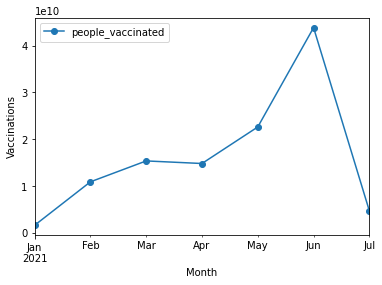

In [21]:
num_vaccinations_each_month.sort_index().plot.line(marker='o', xlabel="Month", ylabel="Vaccinations")

## Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?

Qua biểu đồ cho thấy tháng 6 có một lượng lớn vaccine được tiêm do các đợt bùng phát gia tăng

## Quốc gia tiêm nhiều nhất tại mỗi tháng trong năm 2021?

Để trả lời cho câu hỏi này cần thực hiện những bước sau:
- Bước 1: Tìm những ngày có tiêm vaccine trong năm 2021.Rồi đổi index của bảng thành “date”.
- Bước 2: Từ kết quả ở trên, nhóm tiếp theo “Location” và resample theo tháng. Rồi chọn “Location” ở mỗi tháng mà có nhiều người tiêm vaccine nhất.
- Bước 3: Từ kết quả ở trên, vẽ đồ thị dạng line, trong đó trục hoành là năm và trục tung là số lượng người tiêm vaccine. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Month" và tên trục tung là "Vaccinations".

In [22]:
national_vaccinated = national_vacc[['location', 'date', 'people_vaccinated']]
national_vaccinated_2021 = national_vaccinated[national_vaccinated['date'].dt.year == 2021]

national_vaccinations_each_month = national_vaccinated_2021.set_index('date').groupby('location').resample('M').sum()
national_vaccinations_each_month.reset_index(inplace=True)  

people_vaccinations_month_location = national_vaccinations_each_month.sort_values('people_vaccinated').drop_duplicates('date', keep='last')
max_national_vaccination_each_month = people_vaccinations_month_location.set_index('date')
max_national_vaccination_each_month

,location,people_vaccinated
date,,
2021-01-31,China,3.926926e+08
2021-07-31,China,1.866000e+09
2021-04-30,United States,3.747634e+09
2021-05-31,United States,4.874750e+09
2021-02-28,Colombia,7.464000e+09
2021-03-31,Colombia,7.487969e+09
2021-06-30,China,1.317601e+10


<AxesSubplot:xlabel='Month', ylabel='Vaccinations'>

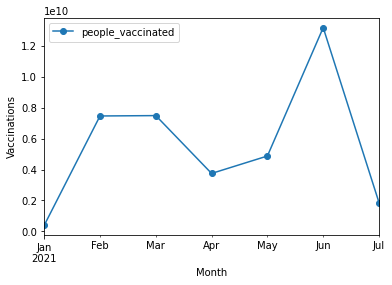

In [23]:
max_national_vaccination_each_month.sort_index().plot.line(marker='o', xlabel="Month", ylabel="Vaccinations")

## Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?

Quốc gia tiêm nhiều trong tháng cho thấy quy trình tiêm chủng hiện đại, và khả năng cao sản xuất thay vì mua như Mĩ, Trung Quốc. Tiêm với quy mô lớn cũng cho thấy vaccine của nước này dùng là an toàn.

## Quốc gia có số người chưa tiêm ít nhất?

Để trả lời cho câu hỏi này cần thực hiện những bước sau:
- Bước 1: Tìm những ngày có tiêm vaccine trong năm 2021. Rồi bỏ các “Location” trùng nhau và chỉ giữ lần có tỷ lệ tiêm cao nhất.
- Bước 2: Thêm cột “not_vaccinated” chứa số người chưa tiêm vaccine bằng công thức số người tiêm nhân (1 - tỷ lệ tiêm trên 100).
- Bước 3: Từ kết quả ở trên, vẽ đồ thị dạng World, trong đó mỗi “Location” đươc chia cách nhau bởi biên giới. Dùng màu sắc để tô các vị trí nằm trong top 20. Đặt tên trục hoành là "Month" và tên trục tung là "Vaccinations".
- Bước 3: Từ kết quả ở trên, vẽ đồ thị dạng line, trong đó trục hoành là năm và trục tung là số lượng người tiêm vaccine. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên tên bảng “Covid-19 Worldwide Least Less Vaccinated”.

In [24]:
national_vaccinated_2021 = national_vacc[national_vacc['date'].dt.year == 2021]

national_vaccinations = national_vaccinated_2021.sort_values('people_vaccinated_per_hundred').drop_duplicates('location', keep='last')

not_vaccinated_per_hundred = national_vaccinations[['location', 'date']]
not_vaccinated_per_hundred.insert(2, "not_vaccinated", (1 - (national_vaccinations['people_vaccinated_per_hundred'] / 100)) * national_vaccinations['people_vaccinated'])

top_20_vaccinated = not_vaccinated_per_hundred.sort_values('not_vaccinated').head(20)
top_20_vaccinated["not_vaccinated"] = top_20_vaccinated["not_vaccinated"].astype('int')

top_20_vaccinated

,location,date,not_vaccinated
10800,Gibraltar,2021-06-29,-6458
22272,Pitcairn,2021-06-15,0
9381,Falkland Islands,2021-04-14,642
18664,Montserrat,2021-06-25,1012
18672,Morocco,2021-02-04,1012
23431,Saint Helena,2021-04-24,1228
19252,Nauru,2021-06-29,2308
19256,Nepal,2021-01-29,2308
30330,Wallis and Futuna,2021-06-29,2712
28521,Tuvalu,2021-06-15,2840


In [31]:
country = list(top_20_vaccinated['location'])
total_not_vaccinated = list(top_20_vaccinated['not_vaccinated'])

list_not_vaccinated = [[country[i], total_not_vaccinated[i]] for i in range(len(country))]

not_vaccianted_world_map = Map(init_opts = opts.InitOpts(width = "900px", height = "460px"))
not_vaccianted_world_map.add("Total Not Vaccinated", list_not_vaccinated, maptype = 'world')

not_vaccianted_world_map.set_series_opts(label_opts = opts.LabelOpts(is_show = False))

not_vaccianted_world_map.set_global_opts(
    visualmap_opts = opts.VisualMapOpts(max_ = 1000000, is_piecewise = False),
    title_opts=opts.TitleOpts(
        title='Covid-19 Worldwide Least Less Vaccinated',
        subtitle='Till July 07th,2021',
        pos_left='center',
        padding=0,
        item_gap=2,
        title_textstyle_opts= opts.TextStyleOpts(
            color='darkblue',
            font_weight='bold',
            font_family='Courier New',
            font_size=30
        ), 
        subtitle_textstyle_opts= opts.TextStyleOpts(
            color='grey',
            font_weight='bold',
            font_family='Courier New',
            font_size=13
        )
    ),
    legend_opts = opts.LegendOpts(is_show = False),
)

not_vaccianted_world_map.render_notebook()

## Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?

Do bệnh dịch lây rất nhanh nên số lượng người chưa chích ảnh hưởng rất lớn tới số người tử vong, cũng như xảy ra trường hợp những người chưa được chính tạo biến thể mới lây cho người đã được chính.

## Các quốc gia đạt miễn dịch cộng đồng sớm nhất?

Miễn dịch cộng đồng là khi có ít nhất 70% dân số được tiêm vaccine, miễn dịch này giúp giảm khả năng bùng phát các đợt dịch lớn.

In [26]:
national_vaccinations = national_vacc.sort_values('people_vaccinated_per_hundred').drop_duplicates('location', keep='last')
herd_immunity_national = national_vaccinations[national_vaccinations['people_vaccinated_per_hundred'] > 70].sort_values('date')[['location', 'date', 'people_vaccinated_per_hundred']]
herd_immunity_national

,location,date,people_vaccinated_per_hundred
23417,Saint Helena,2021-04-10,71.83
9381,Falkland Islands,2021-04-14,75.57
22275,Pitcairn,2021-06-18,100.00
10800,Gibraltar,2021-06-29,116.46
24949,Seychelles,2021-06-30,72.11
5218,Cayman Islands,2021-07-02,73.79
13619,Isle of Man,2021-07-02,74.38
12680,Iceland,2021-07-02,76.79
17517,Malta,2021-07-02,81.82


In [27]:
country = list(national_vaccinations['location'])
total_herd_immunity = list(national_vaccinations['people_vaccinated_per_hundred'])

list_herd_immunity = [[country[i], total_herd_immunity[i]] for i in range(len(country))]

herd_immunity_world_map = Map(init_opts = opts.InitOpts(width = "900px", height = "460px"))
herd_immunity_world_map.add("Total Herd Immunity", list_herd_immunity, maptype = 'world', is_map_symbol_show=False)

herd_immunity_world_map.set_series_opts(label_opts = opts.LabelOpts(is_show = False))

herd_immunity_world_map.set_global_opts(
    visualmap_opts = opts.VisualMapOpts(max_ = 100, is_piecewise = True, pieces = [
    {"min": 80},
    {"min": 70, "max": 79},
    {"min": 50, "max": 69},
    {"min": 20, "max": 49},
    {"min": 10, "max": 19},
    {"max": 9},
    ]),
    title_opts=opts.TitleOpts(
        title='Covid-19 Worldwide Herd Immunity',
        subtitle='Till July 07th,2021',
        pos_left='center',
        padding=0,
        item_gap=2,
        title_textstyle_opts= opts.TextStyleOpts(
            color='darkblue',
            font_weight='bold',
            font_family='Courier New',
            font_size=30
        ), 
        subtitle_textstyle_opts= opts.TextStyleOpts(
            color='grey',
            font_weight='bold',
            font_family='Courier New',
            font_size=13
        )
    ),
    legend_opts = opts.LegendOpts(is_show = False),
)

herd_immunity_world_map.render_notebook()

## Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?

Ta nhận thấy rằng Trung Quốc, Tây  u và Bắc Mỹ là những nước đang dẫn đầu về việc tiến tới miễn dịch cộng đồng. Các nước Châu Phi khó tiếp cận với nguồn Vaccine nên có tỉ lệ rất kém, và rất để bùng phát dịch bệnh và tạo biến thể mới.

## Tình hình tiêm vaccine tại Việt Nam theo tháng trong năm 2021?

In [28]:
vietnam_vacc = national_vacc[national_vacc['location'] == 'Vietnam'][['date', 'people_vaccinated']]

vietnam_vaccinations_each_month = vietnam_vacc.resample('M', on='date').sum()
vietnam_vaccinations_each_month

,people_vaccinated
date,
2021-03-31,649584.0
2021-04-30,4088782.0
2021-05-31,27435319.0
2021-06-30,59423248.0
2021-07-31,10886807.0


<AxesSubplot:xlabel='Month', ylabel='Vaccinations'>

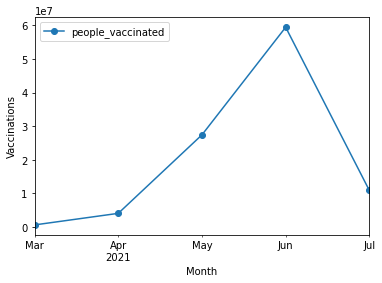

In [29]:
vietnam_vaccinations_each_month.sort_index().plot.line(marker='o', xlabel="Month", ylabel="Vaccinations")

## Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?

Dữ liệu cho thấy tiêm vaccine ở Việt Nam đã bắt đầu từ tháng 3 và đạt đỉnh tại tháng 6 khi tình hình Covid-19 diễn biến phức tạp.

---


# Phân tích để trả lời

---


# Nhìn lại quá trình làm đồ án

---


# Tài liệu tham khảo